In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [64]:
from google.colab import data_table


data_table.enable_dataframe_formatter()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
matplotlib.rcParams["figure.figsize"]=(20,10)
%matplotlib inline

In [4]:
address='/content/drive/MyDrive/ColabNotebooks/KPMG Virtual Internship/data quality/kpmgdata.xlsx'

In [5]:
transactions=pd.read_excel(address,sheet_name='Transactions',header=1)

In [6]:
transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,2003-07-21
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,1997-05-10
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,2010-08-20
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,2004-08-17


#**Transactions**


In [7]:
transactions.shape

(20000, 13)

the dataset has 200000 rows and 13 columns

In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [9]:
transactions.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

the dataset has values missing in the online_order,brand,product_line,product_class,product_size ,standard_cost and product_first_sold_date columns

**vizualizing places where values are missing**

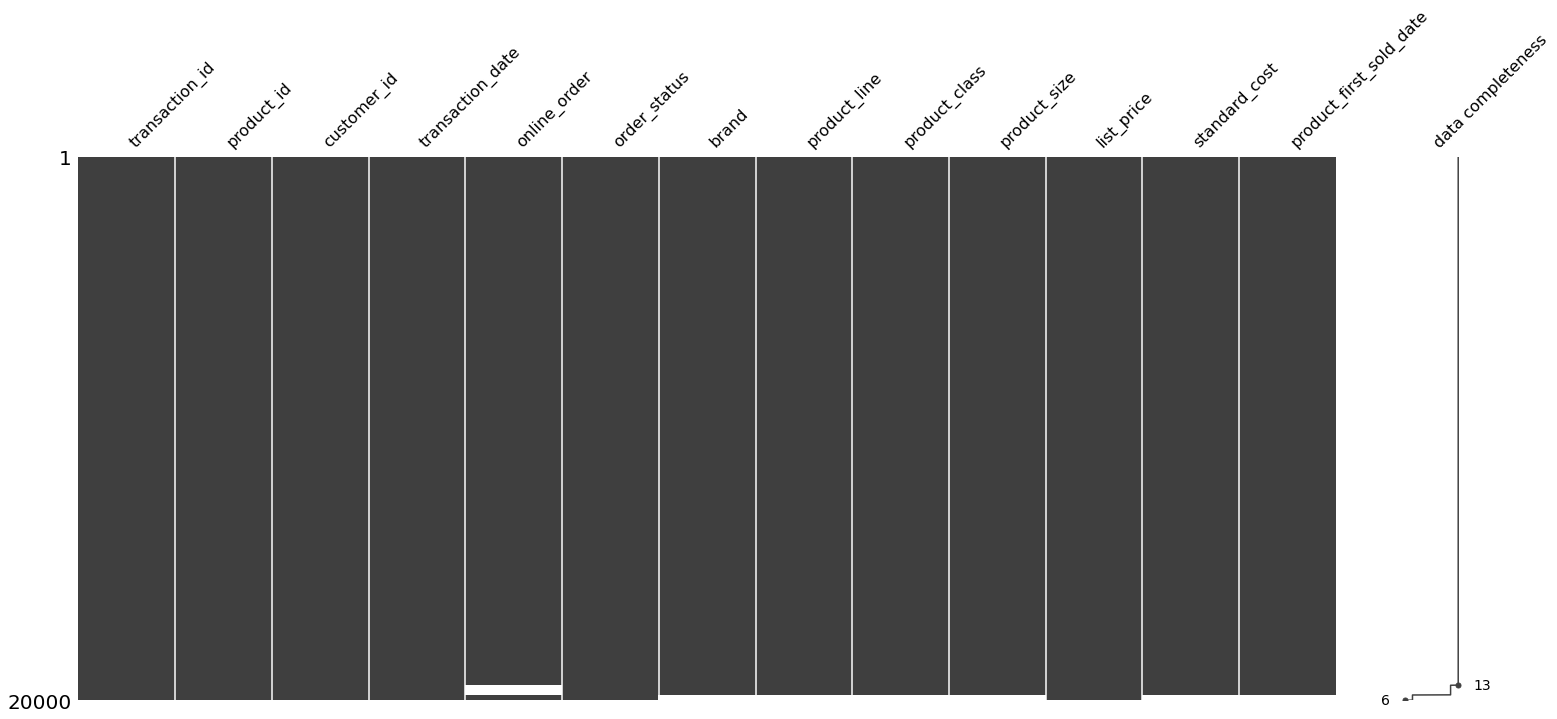

In [10]:
import missingno as msno
msno.matrix(transactions, labels=True, sort="descending")

**vizualizing percentage of values missing in each column**

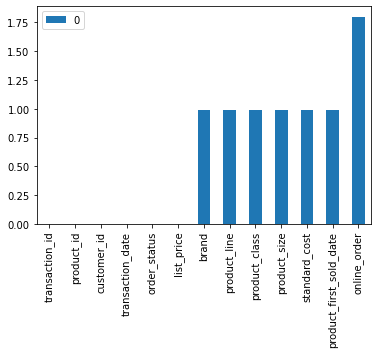

In [11]:
pd.DataFrame((transactions.isna().sum()*100/len(transactions)).sort_values()).plot.bar()

In [12]:
transactions.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10
5,6,25,2339,2017-03-08,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,2006-11-10
6,7,22,1542,2017-04-21,1.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,1993-07-15
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,2009-04-12
8,9,67,1305,2017-08-10,0.0,Approved,Solex,Standard,medium,large,1071.23,380.74,1991-08-05
9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,2004-08-17


In [13]:
transactions.transaction_id.nunique()

20000

All transaction ids are unique

In [14]:
for i in transactions.columns:
  print(f' for column {i} no of unique values-- {transactions[i].nunique()}')

 for column transaction_id no of unique values-- 20000
 for column product_id no of unique values-- 101
 for column customer_id no of unique values-- 3494
 for column transaction_date no of unique values-- 364
 for column online_order no of unique values-- 2
 for column order_status no of unique values-- 2
 for column brand no of unique values-- 6
 for column product_line no of unique values-- 4
 for column product_class no of unique values-- 3
 for column product_size no of unique values-- 3
 for column list_price no of unique values-- 296
 for column standard_cost no of unique values-- 103
 for column product_first_sold_date no of unique values-- 100


In [15]:
t=transactions.copy()

#checking the most frequently brought product id and customers who made most purchases

In [16]:
t.product_id.value_counts()

0      1378
3       354
1       311
35      268
38      267
       ... 
71      137
8       136
16      136
100     130
47      121
Name: product_id, Length: 101, dtype: int64

In [17]:
t.customer_id.value_counts()

2183    14
2476    14
1068    14
1672    13
2912    13
        ..
898      1
2352     1
1846     1
3279     1
1757     1
Name: customer_id, Length: 3494, dtype: int64

In [18]:
g=t.groupby(['customer_id','product_id'])['transaction_id'].count()

In [19]:
g[g>=2]

customer_id  product_id
6            0             2
8            3             2
             4             2
11           10            2
12           72            2
                          ..
3470         3             2
3476         31            2
3481         0             4
3495         0             2
5034         0             3
Name: transaction_id, Length: 914, dtype: int64

In [20]:
t[t.customer_id==3481]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
557,558,0,3481,2017-02-22,0.0,Approved,Trek Bicycles,Standard,high,medium,495.72,297.43,2015-04-11
7633,7634,0,3481,2017-03-09,0.0,Approved,Solex,Standard,medium,medium,441.49,84.99,1993-04-12
8061,8062,0,3481,2017-07-11,1.0,Approved,Giant Bicycles,Standard,medium,medium,230.91,173.18,2006-11-10
8657,8658,74,3481,2017-11-06,1.0,Approved,WeareA2B,Standard,medium,medium,1762.96,950.52,2014-07-28
9196,9197,0,3481,2017-05-04,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2004-08-07
14491,14492,50,3481,2017-10-03,1.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,2002-03-22
19784,19785,32,3481,2017-07-03,1.0,Approved,Giant Bicycles,Standard,high,medium,1179.00,707.40,1997-08-25


In [21]:
g.loc[3481]

product_id
0     4
32    1
50    1
74    1
Name: transaction_id, dtype: int64

In [22]:
g.sort_values(ascending=False)

customer_id  product_id
2358         0             5
2149         0             5
714          0             5
1600         0             5
1674         0             5
                          ..
1174         28            1
             57            1
             72            1
1175         18            1
1740         34            1
Name: transaction_id, Length: 18848, dtype: int64

#checking transaction date

In [23]:
t.transaction_date.dt.month.nunique()

12

In [24]:
t.transaction_date.dt.year.nunique()

1

the transaction data is a 12 month transaction data

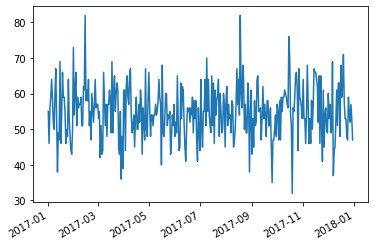

In [25]:
t.transaction_date.value_counts().plot()

In [26]:
t1=t.transaction_date.value_counts()

In [27]:
t.transaction_date.dt.month.value_counts()

10    1771
8     1749
7     1717
5     1685
1     1682
11    1665
3     1656
4     1655
12    1644
2     1623
6     1581
9     1572
Name: transaction_date, dtype: int64

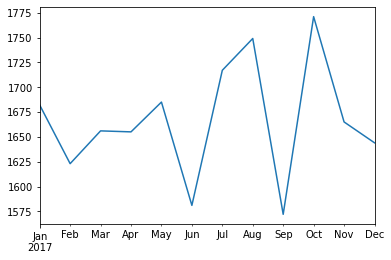

In [28]:
t1.resample('M').sum().plot()

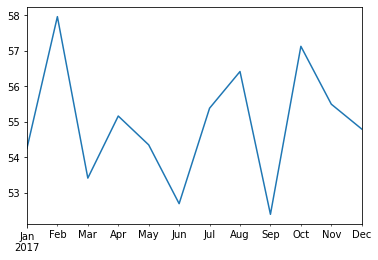

In [29]:
t1.resample('M').mean().plot()

#checking the relationship between product id and brand,product line,product class,product size, list price,standard cost and first sold date

part 1

In [30]:
t.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [31]:
p=t.groupby(['brand','product_id'])['product_size'].count()

In [32]:
p

brand           product_id
Giant Bicycles  0             105
                1             311
                2              46
                4             180
                5              52
                             ... 
WeareA2B        89            145
                91             56
                92            211
                93            121
                96            120
Name: product_size, Length: 168, dtype: int64

In [33]:
t.brand.unique()

array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B', nan], dtype=object)

In [34]:
def getu(b):
  t1=t[t.brand==b]
  print(f'for brand {b.upper()}')
  print(t1.product_id.nunique())
  print(sorted(t1.product_id.unique()))
  print('*'*30)

In [35]:
for i in t.brand.unique()[:-1]:
  getu(i)

for brand SOLEX
36
[0, 2, 4, 6, 8, 10, 13, 14, 17, 18, 21, 22, 24, 28, 30, 36, 38, 41, 43, 45, 46, 49, 52, 59, 62, 63, 66, 67, 71, 73, 79, 81, 83, 90, 91, 97]
******************************
for brand TREK BICYCLES
23
[0, 3, 5, 7, 11, 14, 19, 20, 27, 35, 38, 40, 45, 47, 49, 55, 64, 70, 80, 84, 98, 99, 100]
******************************
for brand OHM CYCLES
27
[0, 6, 9, 19, 25, 30, 33, 37, 40, 42, 46, 51, 52, 53, 56, 58, 61, 68, 72, 80, 86, 87, 93, 95, 97, 98, 99]
******************************
for brand NORCO BICYCLES
25
[0, 9, 15, 16, 18, 23, 28, 29, 34, 41, 43, 56, 61, 67, 69, 70, 72, 77, 79, 81, 82, 86, 88, 90, 100]
******************************
for brand GIANT BICYCLES
29
[0, 1, 2, 4, 5, 7, 11, 12, 25, 31, 32, 33, 35, 39, 50, 53, 60, 64, 66, 69, 75, 78, 82, 84, 87, 89, 94, 95, 96]
******************************
for brand WEAREA2B
28
[0, 10, 12, 15, 17, 21, 22, 26, 29, 31, 34, 44, 48, 50, 54, 57, 59, 63, 65, 74, 76, 77, 85, 89, 91, 92, 93, 96]
******************************


analyzing missing values

In [36]:
q='brand product_line product_class product_size standard_cost product_first_sold_date'.split()

In [37]:
q

['brand',
 'product_line',
 'product_class',
 'product_size',
 'standard_cost',
 'product_first_sold_date']

In [38]:
m=t[t.brand.isna() & t.product_line.isna() & t.product_class.isna() & t.product_size.isna()
& t.standard_cost.isna() & t.product_first_sold_date.isna()]

In [39]:
m.shape

(197, 13)

In [40]:
m

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaT
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaT
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaT
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaT
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaT
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaT
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaT
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaT


In [41]:
m.product_id.unique()

array([0])

In [42]:
m.customer_id.value_counts()

1043    2
1319    2
1503    2
2034    2
2553    2
       ..
1576    1
2598    1
26      1
1075    1
61      1
Name: customer_id, Length: 192, dtype: int64

In [43]:
m.order_status.value_counts()

Approved     196
Cancelled      1
Name: order_status, dtype: int64

In [44]:
m[m.online_order.isna()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
11015,11016,0,2456,2017-05-12,NaN,Approved,NaN,NaN,NaN,NaN,1719.95,NaN,NaT
13024,13025,0,507,2017-07-22,NaN,Approved,NaN,NaN,NaN,NaN,1578.52,NaN,NaT


In [45]:
m.transaction_date.dt.month.value_counts()

3     27
10    20
5     19
6     17
7     17
11    17
1     17
8     14
4     14
9     13
12    11
2     11
Name: transaction_date, dtype: int64

In [46]:
t.transaction_date.dt.month.value_counts()

10    1771
8     1749
7     1717
5     1685
1     1682
11    1665
3     1656
4     1655
12    1644
2     1623
6     1581
9     1572
Name: transaction_date, dtype: int64

In [66]:
t.sort_values('list_price')

Output hidden; open in https://colab.research.google.com to view.

Part 2

In [47]:
t.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [48]:
cols=['customer_id','product_id','brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date']

In [49]:
d=t[cols]

In [50]:
d.head(2)

,customer_id,product_id,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,2950,2,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,3120,3,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03


In [51]:
d1=d[(d.product_id==2) & (d.brand=='Solex') & (d.product_line=='Standard') & (d.product_class=='medium') & (d.product_size=='medium')]

In [52]:
d1

,customer_id,product_id,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,2950,2,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
37,2916,2,Solex,Standard,medium,medium,71.49,53.62,1991-11-07
66,75,2,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
269,2362,2,Solex,Standard,medium,medium,71.49,53.62,2005-08-09
570,1186,2,Solex,Standard,medium,medium,71.49,53.62,2005-08-09
...,...,...,...,...,...,...,...,...,...
19213,1545,2,Solex,Standard,medium,medium,71.49,53.62,2005-08-09
19404,745,2,Solex,Standard,medium,medium,71.49,53.62,2011-04-16
19755,1430,2,Solex,Standard,medium,medium,71.49,53.62,2011-04-16
19873,3420,2,Solex,Standard,medium,medium,71.49,53.62,2012-12-02


In [53]:
d1.customer_id.value_counts()

2755    2
1545    2
304     2
2832    2
2274    2
       ..
712     1
2351    1
2580    1
1473    1
1686    1
Name: customer_id, Length: 186, dtype: int64

In [54]:
d1[d1.customer_id==2755]

,customer_id,product_id,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1382,2755,2,Solex,Standard,medium,medium,71.49,53.62,2012-09-15
3201,2755,2,Solex,Standard,medium,medium,71.49,53.62,2011-08-29


#product_first_sold_date

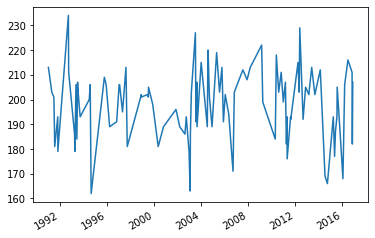

In [55]:
t.product_first_sold_date.value_counts().plot()

In [56]:
t.product_first_sold_date.dt.year.value_counts()

2003.0    1545
1993.0    1360
2011.0    1342
2004.0    1224
2016.0    1190
1991.0    1170
2015.0    1146
2012.0    1044
1997.0    1001
2005.0     826
2010.0     816
1999.0     806
2006.0     770
2013.0     617
1994.0     568
2002.0     568
2014.0     547
1992.0     445
2009.0     421
2007.0     420
1995.0     415
1998.0     403
1996.0     380
2000.0     370
2008.0     213
2001.0     196
Name: product_first_sold_date, dtype: int64

In [57]:
sorted(t.product_first_sold_date.dt.year.unique())

[1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 nan]

In [58]:
t[t.product_first_sold_date.dt.year==2016]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
23,24,82,515,2017-10-18,0.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,2016-02-04
27,28,19,76,2017-12-23,0.0,Approved,Trek Bicycles,Mountain,low,medium,574.64,459.71,2016-07-09
28,29,72,3368,2017-10-13,1.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2016-12-06
31,32,1,3214,2017-02-18,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,2016-11-14
32,33,25,1272,2017-03-20,0.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,2016-02-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19880,19881,35,1982,2017-03-06,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,2016-11-14
19909,19910,72,3143,2017-05-28,1.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2016-12-06
19917,19918,1,3460,2017-07-12,1.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,2016-11-14
19927,19928,13,1205,2017-02-05,0.0,Approved,Solex,Standard,medium,medium,1163.89,589.27,2016-07-09


#Online order and order status

In [59]:
t.online_order.value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [60]:
t.order_status.value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64